In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step1: Importing the train as well as the test data set

<i> You might be wondering why I am doing this, well basically I might change a few things in train dataset and I want to simultaneously change them in test dataset too</i>

In [164]:
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

# Step 2: Data Processing

I will work with the train dataset. But if I change something directly to the data set I will try to change it in the test dataset too!

In [165]:
#lets see what is there in the dataset first
#I will use the pandas.head() function to view the first 5 rows!

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


At first it is of the greatest importance to deal with the NaN values or the missing values. Lets see if we have some missing values in our dataset. I can already see some in the cabins section. Lets see what else we can see!

In [166]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we see the maximum missing value is in the Cabin and then in the Age and at last in the Embarked column!
Lets analyze these columns!

In [167]:
titanic_train.shape

(891, 12)

In [168]:
titanic_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Cabin column is kind of useless at this time. Dropping it won't make any problem. SO lets drop it.

In [169]:
titanic_train.drop(columns=['Cabin'],inplace=True)

In [170]:
titanic_test.drop(columns=['Cabin'],inplace=True)

In [171]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


`Lets fix the embarked section next

In [172]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Changing female=1 and male=0

In [173]:
titanic_train['Sex'].replace({'female':1,'male':0},inplace=True)

In [174]:
titanic_test['Sex'].replace({'female':1,'male':0},inplace=True)

Lets drop the embarked column since it doesn't help us in anything much so!

In [175]:
titanic_train.drop(columns=['Embarked'],inplace=True)
titanic_test.drop(columns=['Embarked'],inplace=True)

In [176]:
df=pd.DataFrame.copy(titanic_train)

In [177]:
df=df[df['Age'].notna()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


In [178]:
df.index=range(714)

In [179]:
married_woman_age=[]
for i in range(df.shape[0]):
    if 'Mrs' in df.loc[i,'Name']:
        married_woman_age.append(df.loc[i,'Age'])

In [180]:
married_man_age=[]
for i in range(df.shape[0]):
    if 'Mr' in df.loc[i,'Name']:
        married_man_age.append(df.loc[i,'Age'])

In [181]:
unmarried_woman_age=[]
for i in range(df.shape[0]):
    if 'Miss' in df.loc[i,'Name']:
        unmarried_woman_age.append(df.loc[i,'Age'])

In [182]:
doctor_age=[]
for i in range(df.shape[0]):
    if 'Dr' in df.loc[i,'Name']:
        doctor_age.append(df.loc[i,'Age'])

In [200]:
child_age=[]
for i in range(df.shape[0]):
    if 'Master' in df.loc[i,'Name']:
        child_age.append(df.loc[i,'Age'])

Let change the missing values of Age

In [183]:
#First lets see the missing values who are female

new_titanic=titanic_train[titanic_train['Age'].isnull()]
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792


In [202]:
for i in range(titanic_train.shape[0]):
    if (('Mr' in titanic_train.iloc[i,3]) & (pd.isna(titanic_train.iloc[i,5]))):
        titanic_train.iloc[i,5]=np.median(married_man_age)
    elif (('Mrs' in titanic_train.iloc[i,3]) & (pd.isna(titanic_train.iloc[i,5]))):
        titanic_train.iloc[i,5]=np.median(married_woman_age)
    elif (('Miss' in titanic_train.iloc[i,3]) & (pd.isna(titanic_train.iloc[i,5]))):
        titanic_train.iloc[i,5]=np.median(unmarried_woman_age)
    elif (('Dr' in titanic_train.iloc[i,3]) & (pd.isna(titanic_train.iloc[i,5]))):
        titanic_train.iloc[i,5]=np.median(doctor_age)
    elif (('Master' in titanic_train.iloc[i,3]) & (pd.isna(titanic_train.iloc[i,5]))):
        titanic_train.iloc[i,5]=np.median(child_age)

In [203]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875


In [213]:
for i in range(titanic_test.shape[0]):
    if (('Mr' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(married_man_age)
    elif (('Mrs' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(married_woman_age)
    elif (('Miss' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(unmarried_woman_age)
    elif (('Ms' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(unmarried_woman_age)
    elif (('Dr' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(doctor_age)
    elif (('Master' in titanic_test.iloc[i,2]) & (pd.isna(titanic_test.iloc[i,4]))):
        titanic_test.iloc[i,4]=np.median(child_age)

In [214]:
titanic_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",0,31.0,0,0,330877,8.4583


In [215]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [216]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64

In [232]:
bins=[0,18,30,60,np.max(titanic_train['Age'].max())]
labels=['<18','18-30','30-60','>60']
titanic_train['Cat_Age']=pd.cut(titanic_train['Age'],bins,labels=labels,include_lowest=True)

In [233]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cat_Age
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,18-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,30-60
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,18-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,30-60
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,30-60


In [236]:
titanic_train.drop(columns=['Fare','Name','Ticket'],inplace=True)

In [238]:
titanic_test.drop(columns=['Fare','Name','Ticket'],inplace=True)

In [237]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cat_Age
0,1,0,3,0,22.0,1,0,18-30
1,2,1,1,1,38.0,1,0,30-60
2,3,1,3,1,26.0,0,0,18-30
3,4,1,1,1,35.0,1,0,30-60
4,5,0,3,0,35.0,0,0,30-60


# Step3: Data Visualization

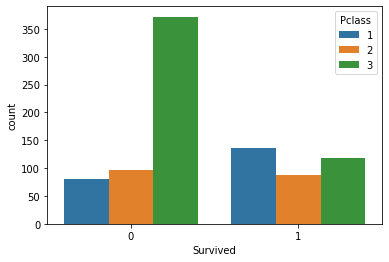

In [221]:
sns.countplot('Survived',hue='Pclass',data=titanic_train)

<ol>
<li>From the plot it is quite evident that Pclass=1 has more survivors compared to its non survivors.</li>
    <li>PClass 3 has the lowest survival rate.</li>
<li>Pclass 2 has identical survivors and non survivors</li>
</ol>

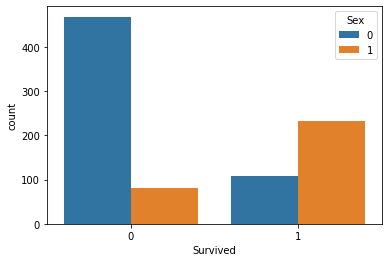

In [222]:
sns.countplot('Survived',hue='Sex',data=titanic_train)

<ul>
    <li>Female Survival rate is more</li>
</ul>

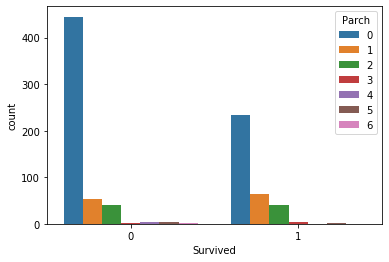

In [223]:
sns.countplot('Survived',hue='Parch',data=titanic_train)

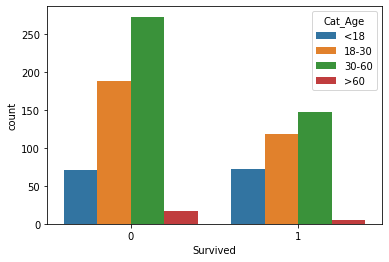

In [234]:
sns.countplot('Survived',hue='Cat_Age',data=titanic_train)

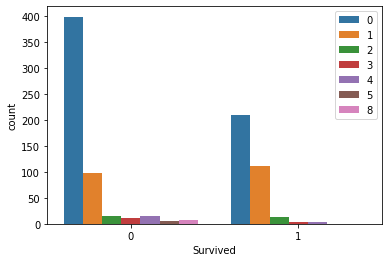

In [246]:
sns.countplot('Survived',hue='SibSp',data=titanic_train).legend(loc='upper right')

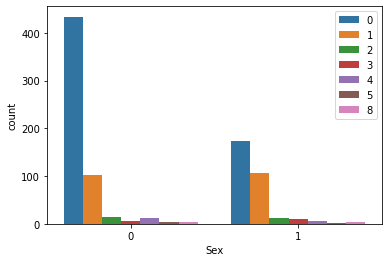

In [248]:
sns.countplot('Sex',hue='SibSp',data=titanic_train).legend(loc='upper right')

This is strange.
Wih the sex column the distribution is more or less same!

# Step 4: Train Test Split

In [241]:
from sklearn.model_selection import train_test_split

In [259]:
X=titanic_train[['Pclass','Sex','Age']].values
y=titanic_train['Survived'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Step 5: Modelling

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,f1_score

In [263]:
params={'n_neighbors':[3,5,7,9,11,13,15,17,19],
       'weights':['uniform','distance'],
       'metric':['euclidean','minkowski']}
gc1=GridSearchCV(KNeighborsClassifier(),params,cv=4,n_jobs=-1)
gc1_result=gc1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [264]:
gc1_result.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [265]:
gc1_result.best_score_

0.7961476725521669

In [267]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
knn.fit(X_train,y_train)
yhat_knn=knn.predict(X_test)

In [272]:
accuracy_score(y_test,yhat_knn)

0.7649253731343284

In [274]:
f1_score(y_test,yhat_knn)

0.6802030456852791

In [276]:
params1={'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':[3,4,5,6,7]}
gc2=GridSearchCV(DecisionTreeClassifier(),
                 params1,
                 cv=4,n_jobs=-1)
gc2_result=gc2.fit(X_train,y_train)


In [277]:
gc2_result.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [278]:
dct=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

dct.fit(X_train,y_train)
yhat_dct=dct.predict(X_test)

In [279]:
accuracy_score(y_test,yhat_dct)

0.753731343283582

In [281]:
f1_score(y_test,yhat_dct)

0.6826923076923077

In [286]:
new_x=titanic_test[['Pclass','Sex','Age']].values

In [287]:
predicted_value=dct.predict(new_x)

In [306]:
predictions=pd.DataFrame(predicted_value)
predictions['PassengerId']=titanic_test['PassengerId']

In [307]:
predictions=predictions[['PassengerId',0]]
predictions.rename(columns={0:'Survived'},inplace=True)

In [309]:
predictions.to_csv('My_titanic.csv',index=False)